In [5]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import itertools 
import datetime
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore") 

In [70]:
miami = pd.read_excel('c:/Users/denis/Desktop/Ironhack/ironhackLabs/Transportation/Users_Monthly.xlsx')

# Data Cleaning

In [3]:
# I hope to have things in modules, and this would be my data cleaning module. However, right now it doesn't work. 

# def clean(x): 
#     x = x[x['UZA Name'] == 'Miami, FL']
#     x = x[x['Agency'] == 'Miami-Dade Transit']
#     x = x.drop(['5 digit NTD ID', 'UZA', 'Unnamed: 226'], axis=1)
#     x_grouped = x.groupby('Modes').sum()
#     x_grouped = x_grouped.T
#     x_test = x_grouped.reset_index()
#     x_test = x_test.rename(columns={"index": "Time"})
#     x_test['Time'] = pd.to_datetime(x_test['Time'], format='%b%y')
#     x_test.drop(['Rail'], axis = 1)
#     return x_test.head(10)

In [4]:
# clean(miami)

In [71]:
miami = miami[miami['UZA Name'] == 'Miami, FL']
miami = miami[miami['Agency'] == 'Miami-Dade Transit']
miami = miami.drop(['5 digit NTD ID', 'UZA', 'Unnamed: 226'], axis=1)
miami_grouped = miami.groupby('Modes').sum()

In [72]:
miami_grouped.head()

JAN02      FEB02      MAR02      APR02      MAY02      JUN02  \
Modes                                                                     
Bus   5512260.00 5212070.00 5584941.00 5485658.00 5526653.00 4868326.00   
Rail  1551952.00 1494895.00 1613905.00 1583007.00 1587454.00 1453326.00   

           JUL02      AUG02      SEP02      OCT02      NOV02      DEC02  \
Modes                                                                     
Bus   5318877.00 5456934.00 5268803.00 5833271.00 5214391.00 5230387.00   
Rail  1603810.00 1591425.00 1527310.00 1777054.00 1714024.00 1651569.00   

           JAN03      FEB03      MAR03      APR03      MAY03      JUN03  \
Modes                                                                     
Bus   5395806.00 5710527.00 6003891.00 5476479.00 5570370.00 5212207.00   
Rail  1665143.00 1671374.00 1699954.00 1747261.00 1706395.00 1721018.00   

           JUL03      AUG03      SEP03      OCT03      NOV03      DEC03  \
Modes                                                                     
Bus   5560537.00 5431215.00 5549182.00 5989423.00 5487946.00 5517526.00   
Rail  1837857.00 1809905.00 1889655.00 1905094.00 1736004.00 1693102.00   

           JAN04      FEB04      MAR04      APR04      MAY04      JUN04  \
Modes                                                                     
Bus   6117990.00 6040880.00 6708846.00 6766912.00 6371456.00 6384199.00   
Rail  1868931.00 1844918.00 2064335.00 2022192.00 2087918.00 2123075.00   

           JUL04      AUG04      SEP04      OCT04      NOV04      DEC04  \
Modes                                                                     
Bus   6658227.00 6587799.00 7025682.00 7415853.00 6711378.00 6850814.00   
Rail  2103294.00 2170690.00 2147603.00 2365618.00 2187580.00 2156588.00   

           JAN05      FEB05      MAR05      APR05      MAY05      JUN05  \
Modes                                                                     
Bus   6703209.00 6458778.00 7189671.00 6738174.00 7135949.00 6145300.00   
Rail  2225823.00 2153950.00 2259151.00 2299201.00 2249773.00 2134386.00   

           JUL05      AUG05      SEP05      OCT05      NOV05      DEC05  \
Modes                                                                     
Bus   6257652.00 6524011.00 6689814.00 6289358.00 7072014.00 7155858.00   
Rail  2068514.00 2115370.00 2130634.00 1706959.00 2065192.00 2201521.00   

           JAN06      FEB06      MAR06      APR06      MAY06      JUN06  \
Modes                                                                     
Bus   7233774.00 6720318.00 7680650.00 6972300.00 7188801.00 7073119.00   
Rail  2227493.00 2123775.00 2376973.00 2120811.00 2195174.00 2250495.00   

           JUL06      AUG06      SEP06      OCT06      NOV06      DEC06  \
Modes                                                                     
Bus   6615189.00 7096612.00 7063309.00 7450511.00 7012951.00 6922286.00   
Rail  2060099.00 2092822.00 2189193.00 2264315.00 2111826.00 2047906.00   

           JAN07      FEB07      MAR07      APR07      MAY07      JUN07  \
Modes                                                                     
Bus   7225204.00 6780075.00 7650948.00 6934652.00 7223046.00 6723085.00   
Rail  2201673.00 2060509.00 2279585.00 2135256.00 2153081.00 2071396.00   

           JUL07      AUG07      SEP07      OCT07      NOV07      DEC07  \
Modes                                                                     
Bus   6714140.00 7194214.00 7209981.00 7601166.00 7119785.00 7044371.00   
Rail  2076103.00 2139699.00 2207266.00 2305904.00 2194663.00 2020055.00   

           JAN08      FEB08      MAR08      APR08      MAY08      JUN08  \
Modes                                                                     
Bus   7122390.00 7040637.00 7347587.00 7253804.00 7449306.00 7149288.00   
Rail  2143571.00 2143541.00 2359474.00 2360301.00 2268108.00 2354573.00   

           JUL08      AUG08      SEP08      OCT08      NOV08      DEC08  \
Modes                  

In [73]:
miami_grouped = miami_grouped.T
miami_test = miami_grouped.reset_index()
miami_test = miami_test.rename(columns={"index": "Time"})

In [74]:
# miami_test = miami_test.rename(columns={"index": "Time"})
miami_test['Time'] = pd.to_datetime(miami_test['Time'], format='%b%y')
miami_test = miami_test.set_index(['Time'], drop=True)

In [75]:
miami_test = miami_test.drop(['Bus'], axis=1)

In [76]:
miami_test.head()

Modes            Rail
Time                 
2002-01-01 1551952.00
2002-02-01 1494895.00
2002-03-01 1613905.00
2002-04-01 1583007.00
2002-05-01 1587454.00

In [193]:
a = miami_test['Bus'].array

In [199]:
def mean(arr, n): 
    sum = 0
      
    for i in range(0, n): 
        sum = sum + arr[i] 
    return (sum / n)  
  
# Function to find standard  
# deviation of given array. 
def standardDeviation(arr, n): 
    sum = 0
      
    for i in range(0, n): 
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))  
  
    return math.sqrt(sum / (n - 1))  
  
  
# Function to find coefficient 
# of variation. 
def coefficientOfVariation(arr, n): 
    return (standardDeviation(arr, n) /
                          mean(arr, n))

arr = miami_test['Rail'].array  
n = len(arr)
  
print(coefficientOfVariation(arr, n)) 

0.13413773903314805


In [197]:
import math

# Data Visualization 

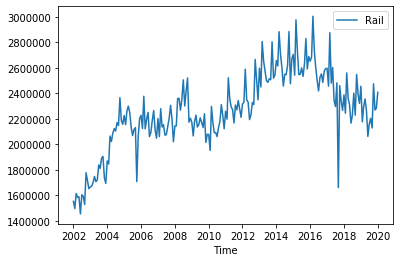

In [12]:
import seaborn as sns
ax = sns.lineplot(data=miami_test)

In [13]:
#This will be for when I work on Rail
# ax = sns.lineplot(x="Time", y="Rail",data=miami_test)

Note: Hurricane Irma occured Sept 2017, Wilma October 2005, and Katrina August 2005

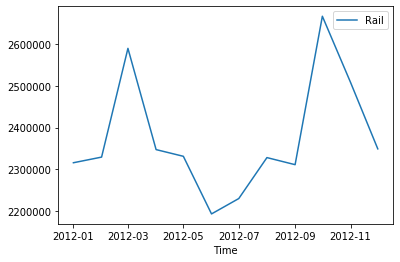

In [14]:
# oneyear = miami_test[miami_test.index.dt.year == 2014]

oneyear = miami_test.loc['2012']
ax = sns.lineplot(data=oneyear)

In [15]:
#This used to show both Rail and Bus together in one graph, better to do it on Tableau

# import matplotlib.pyplot as plt

# fig, ax1 = plt.subplots()
# t = miami_test['Time']
# y1 = miami_test['Bus']
# ax1.plot(t, y1, 'b-')
# ax1.set_xlabel('time')

# ax2 = ax1.twinx()
# y2 = miami_test['Rail']
# ax2.plot(t, y2, 'r.')
# a,b = 0,8000000
# ax1.set_ylim(a,b)
# ax2.set_ylim(a,b)

# fig.tight_layout()
# plt.show()

In [16]:
# miami_test.loc['2002-01-01']['Bus']

# TROUBLE AREA: Removing/Averaging Out Hurricane Data

In [17]:
# def betweenavg(x, df):
# # x= '2017-09-01'
#     df = df.reset_index()
#     xloc = df[df['Time']==pd.to_datetime(x)].index.item()
#     z = miami_test[miami_test['Time']==x.index.item() + 1
#     y = miami_test[miami_test['Time']==pd.to_datetime(x)].index.item()-1
#     a = (miami_test.iloc[z, 1:3] + miami_test.iloc[y, 1:3])/2
#     miami_test.loc[xloc] = a
#     print(miami_test.loc[xloc])

In [18]:
# df = miami_test.reset_index()
# df[df['Time'] == pd.to_datetime('2002-02-01')]

In [19]:
# def betweenavg(x, df):
# # x= ‘2017-09-01’
#     df = df.reset_index()
#     xloc = df[df["Time"]==pd.to_datetime(x)].index[0]
#     avgBus = (df["Rail"][xloc-1] + df["Rail"][xloc+1])/2
#     return(avgBus)



# betweenavg("2005-10-01", miami_test)

In [20]:
# betweenavg('2017-09-01')

In [21]:
# x=9
# miami_test.loc['2017-0x-01']['Bus']
# # miami_test.index.get_loc(t)

In [173]:
# Bus Sept 2017 avg
miami_test.loc['2017-09-01'] = 4912460

In [77]:
#Rail Sept 2017 avg
miami_test.loc['2017-09-01'] = 2471072

In [78]:
#Rail Oct 2005 avg 
miami_test.loc['2005-10-01'] = 2097913

In [174]:
miami_test['Bus'] = miami_test['Bus'].astype(float)
miami_test['Bus'].dtype

dtype('float64')

In [26]:
# miami_test.loc[miami_test.Time=='2017-09-01' ,'Rail'] = a[1]

In [27]:
# miami_test.loc[xloc] = a
# miami_test.loc[xloc][1] = a[0]

In [28]:
# x= '2017-09-01'
# xloc = miami_test[miami_test['Time']==x].index.item()
# z = xloc +1
# y = xloc -1
# a = (miami_test.iloc[z, 1:3] + miami_test.iloc[y, 1:3])/2
# # miami_test.loc[xloc] = a
# # print(miami_test.loc[xloc])

# Dump -- Maybe for later

In [29]:
# year = ['02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
# month = ['JAN', 'FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

# for i in year:
#     for x in miami_test['Time']:
#         miami_test['Time'] = miami_test['Time'].str.replace(i,'20'+i)

# year = ['02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
# for i in year:
#     print('20'+i)

In [30]:
# miami_test = miami_test.set_index(['Time'], drop=True)

In [31]:
# miami_test['Time'] = pd.to_datetime(miami_test['Time'], format='%b%y')

In [32]:
# miami_test.to_excel(r'c:/Users/denis/Desktop/Ironhack/ironhackLabs/Transportation/Miami_Tableau.xlsx', index=False)

# Attempt 1: Stationarity via Log Transformation

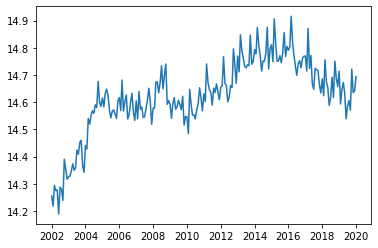

In [33]:
miami_test_logScale = np.log(miami_test)
plt.plot(miami_test_logScale)

In [34]:
movingavg = miami_test_logScale.rolling(window=12).mean()
movingstd = miami_test_logScale.rolling(window=12).std()

In [35]:
submovingavg = miami_test_logScale - movingavg
submovingavg.head()

submovingavg.dropna(inplace = True)

In [36]:
submovingavg.head()

Modes       Rail
Time            
2002-12-01  0.04
2003-01-01  0.04
2003-02-01  0.03
2003-03-01  0.05
2003-04-01  0.06

In [37]:
def test_stationarity(timeseries):

#Determing rolling stats
    movingAvg= timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

#plot rolling stats
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAvg, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='Black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

#perform dickey-fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Rail'], autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statisitc', 'p-value', '#Lags USed', '# of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

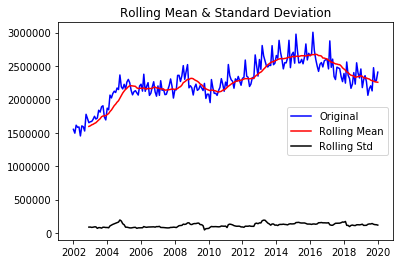

Results of Dickey-Fuller Test:
Test Statisitc            -2.63
p-value                    0.09
#Lags USed                14.00
# of Observations Used   202.00
Critical Value (1%)       -3.46
Critical Value (5%)       -2.88
Critical Value (10%)      -2.57
dtype: float64


In [38]:
test_stationarity(miami_test)

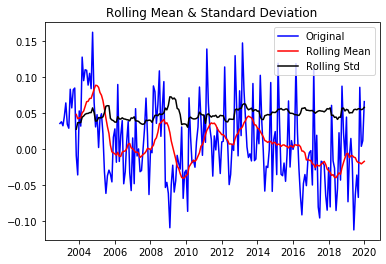

Results of Dickey-Fuller Test:
Test Statisitc            -3.42
p-value                    0.01
#Lags USed                14.00
# of Observations Used   191.00
Critical Value (1%)       -3.47
Critical Value (5%)       -2.88
Critical Value (10%)      -2.57
dtype: float64


In [39]:
test_stationarity(submovingavg)

In [40]:
weightedAvg = miami_test_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
dfweightedAvg = miami_test_logScale - weightedAvg 

# Attempt 2: Stationarity via Differencing 

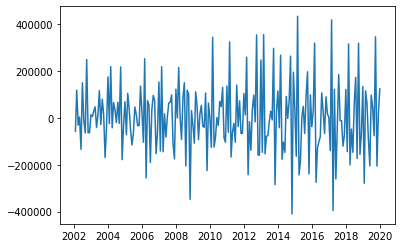

In [41]:
from matplotlib import pyplot
diff = miami_test.diff()
pyplot.plot(diff)
pyplot.show()

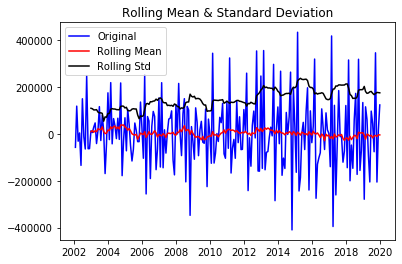

Results of Dickey-Fuller Test:
Test Statisitc            -3.43
p-value                    0.01
#Lags USed                15.00
# of Observations Used   200.00
Critical Value (1%)       -3.46
Critical Value (5%)       -2.88
Critical Value (10%)      -2.57
dtype: float64


In [42]:
diff.dropna(inplace = True)
test_stationarity(diff)

In [43]:
diff

Modes            Rail
Time                 
2002-02-01  -57057.00
2002-03-01  119010.00
2002-04-01  -30898.00
2002-05-01    4447.00
2002-06-01 -134128.00
2002-07-01  150484.00
2002-08-01  -12385.00
2002-09-01  -64115.00
2002-10-01  249744.00
2002-11-01  -63030.00
2002-12-01  -62455.00
2003-01-01   13574.00
2003-02-01    6231.00
2003-03-01   28580.00
2003-04-01   47307.00
2003-05-01  -40866.00
2003-06-01   14623.00
2003-07-01  116839.00
2003-08-01  -27952.00
2003-09-01   79750.00
2003-10-01   15439.00
2003-11-01 -169090.00
2003-12-01  -42902.00
2004-01-01  175829.00
2004-02-01  -24013.00
2004-03-01  219417.00
2004-04-01  -42143.00
2004-05-01   65726.00
2004-06-01   35157.00
2004-07-01  -19781.00
2004-08-01   67396.00
2004-09-01  -23087.00
2004-10-01  218015.00
2004-11-01 -178038.00
2004-12-01  -30992.00
2005-01-01   69235.00
2005-02-01  -71873.00
2005-03-01  105201.00
2005-04-01   40050.00
2005-05-01  -49428.00
2005-06-01 -115387.00
2005-07-01  -65872.00
2005-08-01   46856.00
2005-09-01   15264.00
2005-10-01  -32721.00
2005-11-01  -32721.00
2005-12-01  136329.00
2006-01-01   25972.00
2006-02-01 -103718.00
2006-03-01  253198.00
2006-04-01 -256162.00
2006-05-01   74363.00
2006-06-01   55321.00
2006-07-01 -190396.00
2006-08-01   32723.00
2006-09-01   96371.00
2006-10-01   75122.00
2006-11-01 -152489.00
2006-12-01  -63920.00
2007-01-01  153767.00
2007-02-01 -141164.00
2007-03-01  219076.00
2007-04-01 -144329.00
2007-05-01   17825.00
2007-06-01  -81685.00
2007-07-01    4707.00
2007-08-01   63596.00
2007-09-01   67567.00
2007-10-01   98638.00
2007-11-01 -111241.00
2007-12-01 -174608.00
2008-01-01  123516.00
2008-02-01     -30.00
2008-03-01  215933.00
2008-04-01     827.00
2008-05-01  -92193.00
2008-06-01   86465.00
2008-07-01  150842.00
2008-08-01 -204605.00
2008-09-01  117671.00
2008-10-01  102328.00
2008-11-01 -347590.00
2008-12-01   31514.00
2009-01-01  -31068.00
2009-02-01 -107951.00
2009-03-01  111612.00
2009-04-01   50705.00
2009-05-01  -92638.00
2009-06-01   17967.00
2009-07-01   53949.00
2009-08-01  -34936.00
2009-09-01  -39684.00
2009-10-01  106702.00
2009-11-01 -224834.00
2009-12-01   63643.00
2010-01-01    -978.00
2010-02-01 -125193.00
2010-03-01  344909.00
2010-04-01 -124213.00
2010-05-01  -82422.00
2010-06-01    1849.00
2010-07-01  -31912.00
2010-08-01   71073.00
2010-09-01   48390.00
2010-10-01  130747.00
2010-11-01  -84846.00
2010-12-01 -103756.00
2011-01-01  136708.00
2011-02-01  -61167.00
2011-03-01  324756.00
2011-04-01 -166797.00
2011-05-01  -61144.00
2011-06-01  -23113.00
2011-07-01 -103826.00
2011-08-01  140229.00
2011-09-01  -36994.00
2011-10-01   73457.00
2011-11-01  -66742.00
2011-12-01  -65659.00
2012-01-01  104269.00
2012-02-01   13482.00
2012-03-01  259838.00
2012-04-01 -241912.00
2012-05-01  -16026.00
2012-06-01 -137677.00
2012-07-01   36715.00
2012-08-01   97867.00
2012-09-01  -16911.00
2012-10-01  354712.00
2012-11-01 -157989.00
2012-12-01 -158925.00
2013-01-01  247626.00
2013-02-01 -146922.00
2013-03-01  356407.00
2013-04-01 -153013.00
2013-05-01  -78454.00
2013-06-01  -74795.00
2013-07-01  -14214.00
2013-08-01   29034.00
2013-09-01   -8017.00
2013-10-01  297433.00
2013-11-01 -284904.00
2013-12-01   22397.00
2014-01-01  115493.00
2014-02-01  -41586.00
2014-03-01  268167.00
2014-04-01 -176499.00
2014-05-01 -103030.00
2014-06-01 -147222.00
2014-07-01   92064.00
2014-08-01   -1974.00
2014-09-01   73582.00
2014-10-01  264206.00
2014-11-01 -409821.00
2014-12-01  195753.00
2015-01-01   34713.00
2015-02-01 -163660.00
2015-03-01  434599.00
2015-04-01 -243499.00
2015-05-01 -185999.00
2015-06-01    2942.00
2015-07-01   49608.00
2015-08-01  -66477.00
2015-09-01   99387.00
2015-10-01  197407.00
2015-11-01 -239268.00
2015-12-01   98744.00
2016-01-01  -37101.00
2016-02-01   32729.00
2016-03-01  320079.00
2016-04-01 -274679.00
2016-05-01 -129431.00
2016-06-01 -101554.00
2016-07-01  -80048.00
2016-08-01  107259.00
2016-09-01   25519.00
2016-10-01  -66266.00
2016-11-01   90232.00
2016-12-01   17783.00
2017-01-01    2697

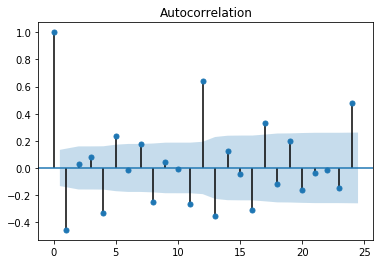

In [44]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff)
pyplot.show()

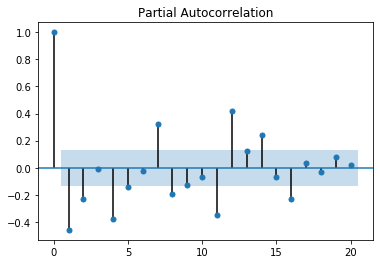

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diff, lags=20)
pyplot.show()

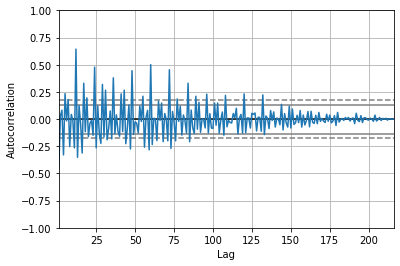

In [46]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(diff)
pyplot.show()

# Attempt 3: Stationarity via Second Differencing

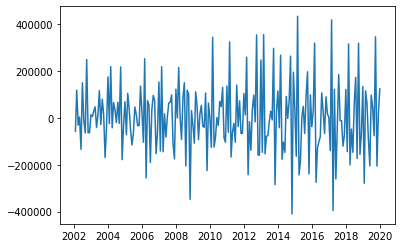

In [47]:
diff2 = miami_test.diff(periods=2)
pyplot.plot(diff)
pyplot.show()

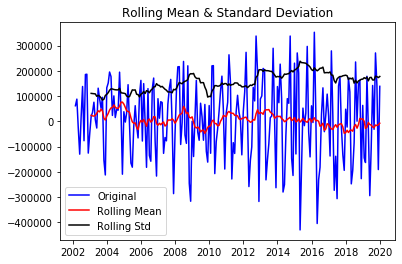

Results of Dickey-Fuller Test:
Test Statisitc            -3.39
p-value                    0.01
#Lags USed                14.00
# of Observations Used   200.00
Critical Value (1%)       -3.46
Critical Value (5%)       -2.88
Critical Value (10%)      -2.57
dtype: float64


In [48]:
diff2.dropna(inplace = True)
test_stationarity(diff2)

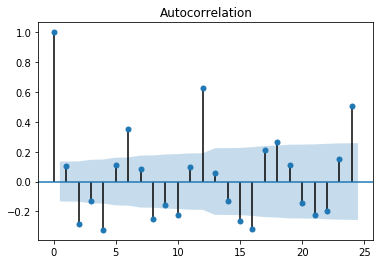

In [49]:
plot_acf(diff2)
pyplot.show()

# ARIMA models

                             ARIMA Model Results                              
Dep. Variable:                 D.Rail   No. Observations:                  216
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2840.201
Method:                       css-mle   S.D. of innovations         124080.243
Date:                Thu, 19 Mar 2020   AIC                           5692.403
Time:                        19:03:56   BIC                           5712.654
Sample:                    02-01-2002   HQIC                          5700.584
                         - 01-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3962.3379   2966.586      1.336      0.183   -1852.064    9776.739
ar.L1.D.Rail    -0.7905      0.128     -6.196      0.000      -1.041      -0.540
ar.L2.D.Rail    -0.0717      0.111     -0.64

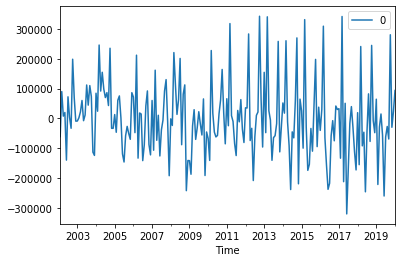

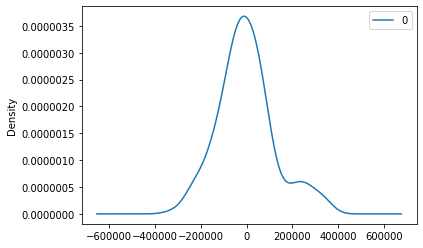

               0
count     216.00
mean    -1007.87
std    124414.15
min   -320453.45
25%    -71220.26
50%     -9136.87
75%     62211.31
max    342646.28


In [50]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(miami_test, order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rail   No. Observations:                  216
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2842.157
Method:                       css-mle   S.D. of innovations         125225.621
Date:                Thu, 19 Mar 2020   AIC                           5692.314
Time:                        19:03:57   BIC                           5705.815
Sample:                    02-01-2002   HQIC                          5697.768
                         - 01-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3962.3379   2823.786      1.403      0.162   -1572.182    9496.857
ar.L1.D.Rail     0.0598      0.101      0.592      0.554      -0.138       0.258
ma.L1.D.Rail    -0.6923      0.072     -9.56

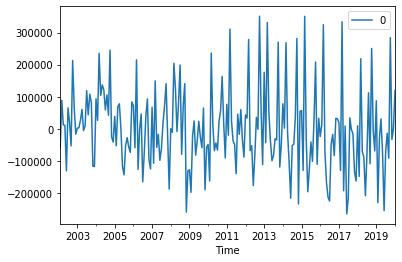

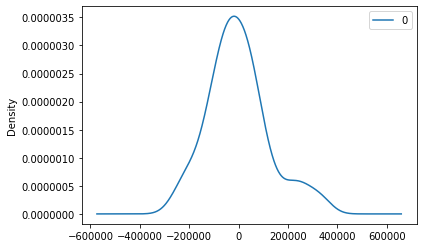

               0
count     216.00
mean    -1065.78
std    125554.40
min   -265522.24
25%    -78185.53
50%    -12535.68
75%     59979.72
max    350773.95


In [51]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(miami_test, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

                             ARIMA Model Results                              
Dep. Variable:                D2.Rail   No. Observations:                  215
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -2837.523
Method:                       css-mle   S.D. of innovations         128393.446
Date:                Thu, 19 Mar 2020   AIC                           5685.046
Time:                        19:03:58   BIC                           5701.899
Sample:                    03-01-2002   HQIC                          5691.855
                         - 01-01-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -83.8677     78.931     -1.063      0.289    -238.570      70.835
ar.L1.D2.Rail    -0.5616      0.066     -8.450      0.000      -0.692      -0.431
ar.L2.D2.Rail    -0.2276      0.066     

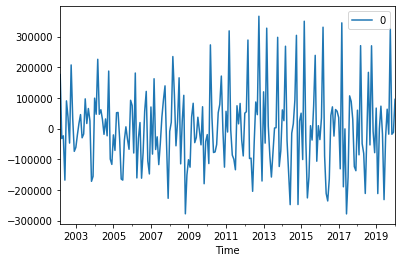

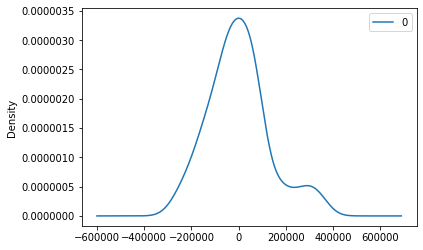

               0
count     215.00
mean     -141.12
std    130076.17
min   -278165.21
25%    -82050.16
50%    -11133.46
75%     61838.93
max    366308.76


In [52]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(miami_test, order=(2,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

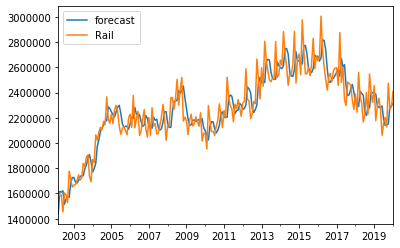

In [53]:
model_fit.plot_predict(dynamic=False)
plt.show()

# Itertools for Optimization 

In [54]:
# import itertools
# p=d=q=range(0,13)
# pdq = list(itertools.product(p,d,q))

In [55]:
#This code freezes computer
# new = []
# for param in pdq:
#     try:
#         model = ARIMA(train, order=param)
#         fitted = model.fit()
#         fc, se, conf = fitted.forecast(54, alpha=0.05)
#         mape = np.mean(np.abs(fc - test.values)/np.abs(test.values)) 
#         new.append({param : mape})
#     except:
#         continue
        

In [56]:
# new

In [57]:
new = {k:v for element in new for k,v in element.items()}

In [58]:
# {k: v for k, v in sorted(new.items(), key=lambda item: item[1])}

In [59]:
#Code below doesn't work 
# temp = min(new.values()) 
# res = [key for key in new if new[key] == temp] 
  
# # printing result  
# print("Keys with minimum values are : " + str(res))

# Training the model

In [79]:
from statsmodels.tsa.stattools import acf

# Create Training and Test at 80% // 20%. Should standardize this for final code! 
train = miami_test[:174]
test = miami_test[174:]

In [61]:
model = ARIMA(train, order=(1,1, 1))  
fitted = model.fit()  

In [52]:
# train

In [63]:
fc, se, conf = fitted.forecast(43, alpha=0.05)  # 95% conf

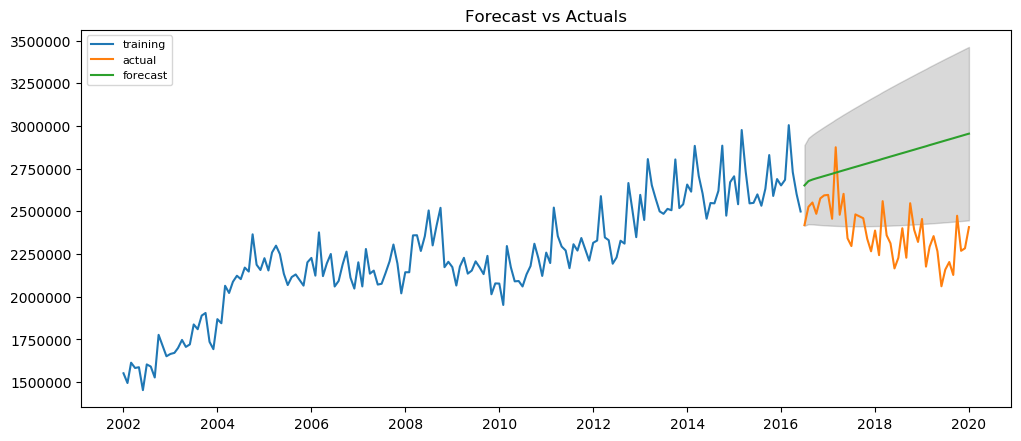

In [64]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [65]:
# predictions = fitted.forecast(64)[0]

In [66]:
# predictions

In [67]:
print(fitted.aic)

4547.439084961434


In [68]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
#     corr = np.corrcoef(forecast, actual)[0,1]   # corr
#     mins = np.amin(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     maxs = np.amax(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     minmax = 1 - np.mean(mins/maxs)             # minmax
# ?                    # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.18662528072719006,
 'me': 429796.45039658877,
 'mae': 433229.300439103,
 'mpe': 0.18543144483323495,
 'rmse': 465725.10646503186}

# Trying different models

In [69]:
model = ARIMA(train, order=(2,2, 0))  
fitted = model.fit()  

In [70]:
fc, se, conf = fitted.forecast(43, alpha=0.05)  # 95% conf

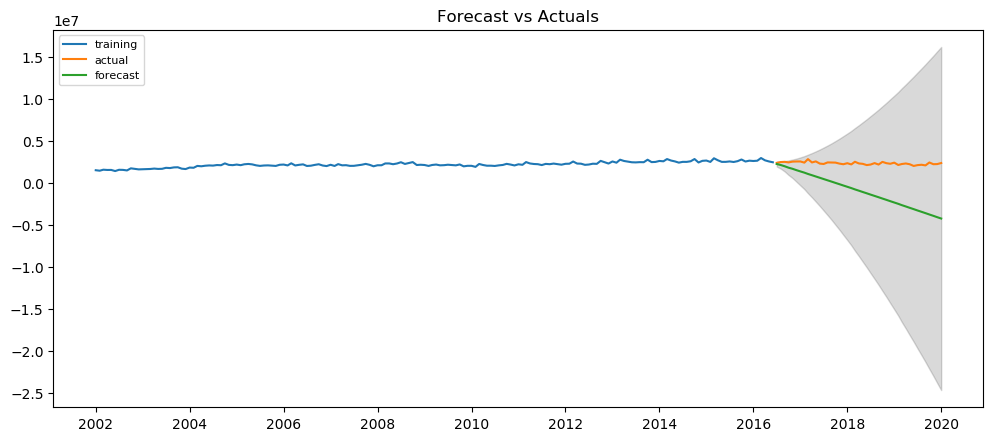

In [71]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [72]:
print(fitted.aic)

4607.354915376044


In [73]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
#     corr = np.corrcoef(forecast, actual)[0,1]   # corr
#     mins = np.amin(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     maxs = np.amax(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     minmax = 1 - np.mean(mins/maxs)             # minmax
# ?                    # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 1.383238899841477,
 'me': -3291862.70524056,
 'mae': 3293259.1587543003,
 'mpe': -1.3825888544603857,
 'rmse': 3817478.505182482}

# Decomposition - Bus Ridership

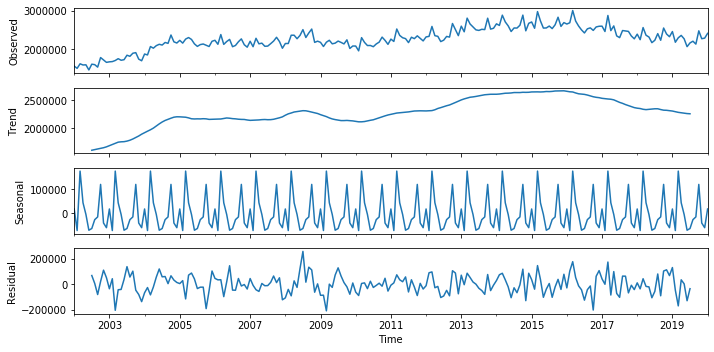

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
plt.rcParams['figure.figsize'] = [10, 5]
result = seasonal_decompose(miami_test['Rail'])
result.plot()
pyplot.savefig('decompose_rail.png')
pyplot.show()

# Grid Search -- SARIMA

In [84]:
import itertools
#set parameter range
p = range(0,3)
q = range(0,3)
d = range(1,2)
s = range(12,13)
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, s))
# SARIMA model pipeline
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train,
                                    order=param,
                                    seasonal_order=param_seasonal)
            results = mod.fit(max_iter = 50, method = 'powell', disp=0)
            forecast = results.predict(start=1, end=int(len(miami_test)))
            miami_test['Forecast'] = forecast
            mape = np.mean(np.abs(miami_test["Forecast"][174:] - miami_test["Rail"][174:])/np.abs(miami_test["Rail"][174:]))
            print('SARIMA{},{} - MAPE:{}'.format(param, param_seasonal, mape))  
        except:
            continue


SARIMA(0, 1, 0),(0, 1, 0, 12) - MAPE:0.07535442725931116
SARIMA(0, 1, 0),(0, 1, 1, 12) - MAPE:0.11515010852554866
SARIMA(0, 1, 0),(0, 1, 2, 12) - MAPE:0.11531644214102692
SARIMA(0, 1, 0),(1, 1, 0, 12) - MAPE:0.09860803619214105
SARIMA(0, 1, 0),(1, 1, 1, 12) - MAPE:0.11482844935903924
SARIMA(0, 1, 0),(1, 1, 2, 12) - MAPE:0.11472979005577254
SARIMA(0, 1, 0),(2, 1, 0, 12) - MAPE:0.09986338129288354
SARIMA(0, 1, 0),(2, 1, 1, 12) - MAPE:0.11364326011601344
SARIMA(0, 1, 0),(2, 1, 2, 12) - MAPE:0.11637532715663929
SARIMA(0, 1, 1),(0, 1, 0, 12) - MAPE:0.09242951774717728
SARIMA(0, 1, 1),(0, 1, 1, 12) - MAPE:0.12173766752224867
SARIMA(0, 1, 1),(0, 1, 2, 12) - MAPE:0.12381562773524467
SARIMA(0, 1, 1),(1, 1, 0, 12) - MAPE:0.1107930632344618
SARIMA(0, 1, 1),(1, 1, 1, 12) - MAPE:0.1232844437057125
SARIMA(0, 1, 1),(1, 1, 2, 12) - MAPE:0.12385572661280347
SARIMA(0, 1, 1),(2, 1, 0, 12) - MAPE:0.11133747425703783
SARIMA(0, 1, 1),(2, 1, 1, 12) - MAPE:0.12473896017453637
SARIMA(0, 1, 1),(2, 1, 2, 12) - M

In [56]:
import itertools
new = []
#set parameter range
p = range(0,1)
q = range(0,2)
d = range(1,2)
s = range(12,13)
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, s))
# SARIMA model pipeline
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train,
                                    order=param,
                                    seasonal_order=param_seasonal)
            results = mod.fit(max_iter = 50, method = 'powell')
            new.append({'Param': param, 'S_Param': param_seasonal, 'AIC': results.aic})
#             new.append('SARIMA{},{} - AIC:{}'.format(param, param_seasonal, results.aic))
#             print('SARIMA{},{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 13.182964
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 13.098895
         Iterations: 2
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: 13.105919
         Iterations: 2
         Function evaluations: 53
Optimization terminated successfully.
         Current function value: 13.026034
         Iterations: 2
         Function evaluations: 68


In [40]:
# new[10][-21:]
aic = []
for x in new:
    i = x[-21:]
    aic.append(i)

In [66]:
from operator import itemgetter
min_bus =min(new, key=itemgetter('AIC'))

In [53]:
a = {k:v for element in new for k,v in element.items()}

In [69]:
min_bus['S_Param']

(0, 1, 1, 12)

In [79]:
# SARIMA(0, 1, 1),(1, 1, 1, 12) - AIC:4225.978265791773

# Himanshu's Sarima

In [ ]:
# train order=(2,1,0), seasonal_order=(0,1,1,12)

                                 Statespace Model Results                                 
Dep. Variable:                               Rail   No. Observations:                  174
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 12)   Log Likelihood               -1916.339
Date:                            Tue, 31 Mar 2020   AIC                           3838.677
Time:                                    18:11:49   BIC                           3847.689
Sample:                                01-01-2002   HQIC                          3842.339
                                     - 06-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4662      0.088     -5.282      0.000      -0.639      -0.293
ar.S.L12      -0.3847      0.083   

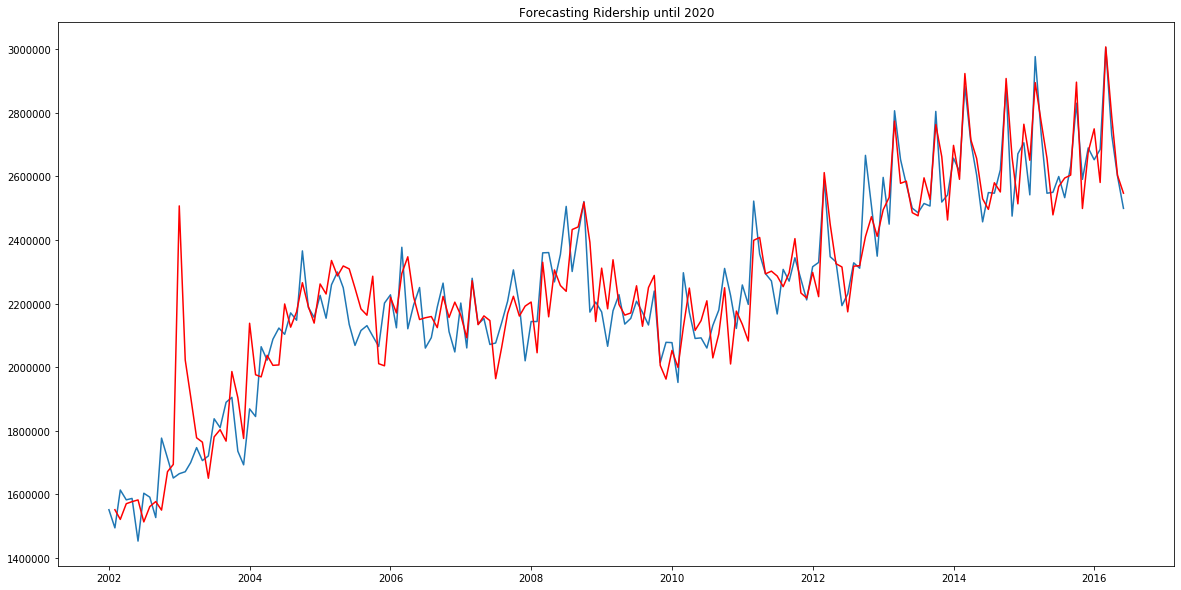

In [98]:
model = SARIMAX(train, order=(0,1,1), seasonal_order=(1,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
fitted = model.fit()
print(fitted.summary())
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.plot(train)
fitted_df = fitted.fittedvalues[1:]
plt.plot(fitted_df, color='red')
plt.title('Forecasting Ridership until 2020')
plt.show() 

In [86]:
forecast = fitted.predict(start=1, end=int(len(miami_test)))
# forecast

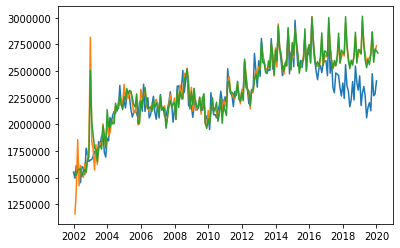

In [87]:
# plot the predictions for validation set
# Make it tableau 
#Make calcuated field and then can color based on that calcuated field. if / else 
plt.plot(miami_test, label='Train')
plt.plot(forecast, label='Prediction')
plt.show()

In [ ]:
# forecastt = fitted.predict(start=174, end=int(len(test)))
# forecastt

In [ ]:
# miami_test['Forecast'] = forecast
# miami_test[['Bus', 'Forecast']].plot(figsize=(16, 12))  
# # data['Forecast'] = fitted.forecast(100) 
# # data[['Price', 'Forecast']].plot(figsize=(12, 8))

In [ ]:
# import datetime
# start = datetime.datetime.strptime("2020-02-01", "%Y-%m-%d")
# date_list = pd.date_range('2020-02-01', freq='1M', periods=23)
# # future = pd.DataFrame(index=date_list, columns= miami_test.columns)
data = pd.concat([miami_test, future])

In [94]:
#combined all datasets for Tableau
import datetime
miami_test['Training Forecast'] = forecast[:174]
miami_test['Testing Forecast'] = forecast[174:]
start = datetime.datetime.strptime("2020-02-01", "%Y-%m-%d")
date_list = pd.date_range('2020-02-01', freq='1M', periods=23)
future = pd.DataFrame(index=date_list, columns= miami_test.columns)
future.index = future.index.map(lambda t: t.replace(day=1))
pred_uc = fitted.get_forecast(steps=66)
future['Future'] = pred_uc.predicted_mean
data = pd.concat([miami_test, future])
# data.tail(12)

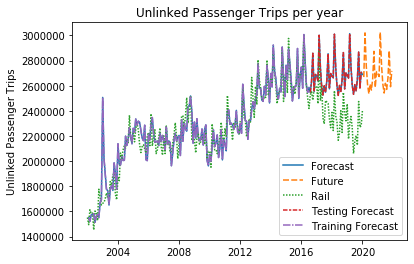

In [95]:
ax = sns.lineplot(data=data)
ax.set_title('Unlinked Passenger Trips per year')
ax.set_ylabel('Unlinked Passenger Trips')
plt.show()

In [161]:
data.to_excel(r'c:/Users/denis/Desktop/Ironhack/ironhackLabs/Transportation/Rail_F.xlsx')

In [182]:
predictions = miami_test[174:]

In [183]:
predictions = predictions.drop(['Future'], axis=1)

KeyError: "['Future'] not found in axis"

In [ ]:
# from statsmodels.tools.eval_measures import rmse
# error=rmse(predictions["Rail"], predictions["Forecast"])
# error

In [184]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
#     corr = np.corrcoef(forecast, actual)[0,1]   # corr
#     mins = np.amin(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     maxs = np.amax(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     minmax = 1 - np.mean(mins/maxs)             # minmax
# ?                    # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(predictions["Forecast"], predictions["Bus"])

{'mape': 0.04745269509682882,
 'me': 66002.12019956259,
 'mae': 219529.44398747582,
 'mpe': 0.013294247126930989,
 'rmse': 276301.5174782122}

In [165]:
fitted.aic

4179.717104800176

In [97]:
print('The Mean Absolute Percentage Error is: ' + str(mape))

The Mean Absolute Percentage Error is: 0.12287257130562089


In [ ]:
# start = datetime.datetime.strptime("2020-02-01", "%Y-%m-%d")
# date_list = [start + relativedelta(months=x) for x in range(0,12)]
# future = pd.DataFrame(index=date_list, columns= miami_test.columns)
# df = pd.concat([miami_test, future])

# df['forecast'] = results.predict(start = 217, end = 229, dynamic= True)  
# df[['Bus', 'forecast']].ix[-24:].plot(figsize=(12, 8)) 
# # data['forecast'] = fitted.predict(start = 229, end = 250, dynamic= True)  
# # data[['Bus', 'forecast']].ix[-24:].plot(figsize=(12, 8)) 

In [112]:
pred_uc = fitted.get_forecast(steps=66)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [ ]:
# pred_uc = fitted.get_forecast(start = datetime.datetime.strptime("2016"),
#                               end =datetime.datetime.strptime("2021"))

In [ ]:
pred_uc.predicted_mean

In [ ]:
ax = miami_test.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Untrained Model')
# fitted_df.plot(ax=ax, label='Trained Model')
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('unlinked passenger trips')
# ax.ticklabel_format(useOffset=False)
# ax.set_ylim((-50000000, 5000000))
plt.legend()
plt.show()

In [ ]:
# K = len(test)
# forecast = model_fit.forecast(K)
# # forecast = np.exp(forecast)

# plt.figure(figsize=(10,5))
# plt.plot(forecast, 'r');
# plt.plot(miami_test, 'b');
# # plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-test)**2)/len(test)));
# plt.xlabel('Years'); 
# plt.ylabel('Passangers');
# # plt.axvline(x=miami_test(split_point), color='black');

# Unsuccessful SARIMA 1

In [ ]:
# from pyramid.arima import auto_arima
# stepwise_model = auto_arima(miami_test, start_p=1, start_q=1,
#                            max_p=3, max_q=3, m=12,
#                            start_P=0, seasonal=True,
#                            d=1, D=1, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)
# print(stepwise_model.aic())

In [ ]:
# percent_training = 0.75
# split_point = round(len(miami_test) * percent_training)
# train, test = miami_test[0:split_point], miami_test[split_point:]

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# model = SARIMAX(miami_test, order=(1,1,1), seasonal_order=(1,0,0,12), enforce_stationarity=False, enforce_invertibility=False) 
# model_fit = model.fit(disp=False)



In [ ]:
# K = len(test)
# forecast = model_fit.forecast(K)
# # forecast = np.exp(forecast)

# plt.figure(figsize=(10,5))
# plt.plot(forecast, 'r');
# plt.plot(miami_test, 'b');
# # plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-test)**2)/len(test)));
# plt.xlabel('Years'); 
# plt.ylabel('Passangers');
# # plt.axvline(x=miami_test(split_point), color='black');